In [ ]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
excel_file = "CoralBleaching-2.xlsx"
df = pd.read_excel(excel_file)

# Display the first few rows of the DataFrame to understand its structure
print("First few rows of the DataFrame:")
print(df.head())

# Get information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())

# Get summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


First few rows of the DataFrame:
     ID REGION SUBREGION COUNTRY               LOCATION    LAT    LON  MONTH  \
0  7067    NaN       NaN  France     Hermitage, Reunion -21.22  55.22    4.0   
1  7068    NaN       NaN  France  Saint Gilles, Reunion -21.05  55.23    7.0   
2  7069    NaN       NaN  France     Saint-Leu, Reunion -21.16  55.28    2.0   
3  4024    NaN       NaN  France              SE France  43.00   5.00    8.0   
4  7049    NaN       NaN   Macau   Koh Tao, Surat Thani  10.12  99.81    7.0   

   YEAR DEPTH  ...  RECOVERY_CODE RECOVERY          SURVEY_TYPE SURVEY_AREA  \
0  2008     6  ...            NaN      NaN  Reef Check Protocol         NaN   
1  2008   6.5  ...            NaN      NaN  Reef Check Protocol         NaN   
2  2008     6  ...            NaN      NaN  Reef Check Protocol         NaN   
3  1999   NaN  ...            NaN      NaN               Diving      100 km   
4  2009     4  ...            NaN      NaN  Reef Check Protocol         NaN   

           

In [ ]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
excel_file = "CoralBleaching-2.xlsx"
df = pd.read_excel(excel_file)

# Drop rows with missing location information
df.dropna(subset=['COUNTRY'], inplace=True)

# Group by country and calculate total events and average severity
hotspots = df.groupby('COUNTRY').agg({
    'ID': 'count',  # Total number of events
    'SEVERITY_CODE': 'mean'  # Average severity
}).rename(columns={'ID': 'Total Events', 'SEVERITY_CODE': 'Avg Severity'}).reset_index()

# Sort hotspots by total events in descending order
hotspots = hotspots.sort_values(by='Total Events', ascending=False)

# Display top 10 hotspots
print("Top 10 Coral Bleaching Hotspots:")
print(hotspots.head(10))


Top 10 Coral Bleaching Hotspots:
                               COUNTRY  Total Events  Avg Severity
97  Torres Strait & Great Barrier Reef          2022      1.076657
56                              Mexico           873      1.442153
28                                Fiji           410     -0.434146
21                                Cuba           196     -0.086735
49                            Malaysia           169      0.402367
29                       Florida (USA)           149      0.859060
2                            Australia           135      0.629630
9                               Belize           115      1.078261
31                    French Polynesia           112      1.276786
5                              Bahamas           111      1.036036


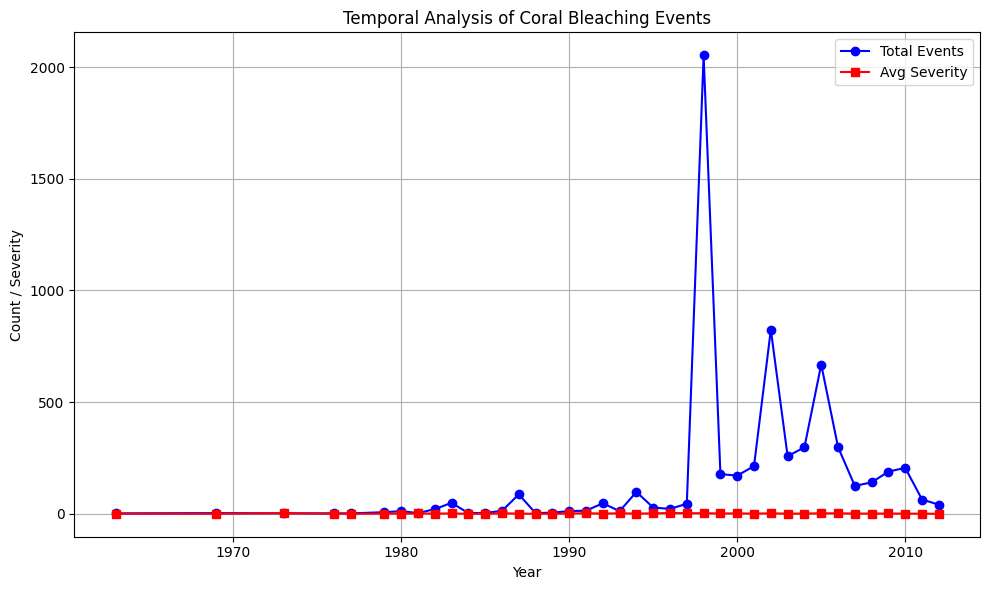

In [ ]:
import matplotlib.pyplot as plt

# Group by year and calculate total events and average severity
temporal_analysis = df.groupby('YEAR').agg({
    'ID': 'count',  # Total number of events
    'SEVERITY_CODE': 'mean'  # Average severity
}).rename(columns={'ID': 'Total Events', 'SEVERITY_CODE': 'Avg Severity'}).reset_index()

# Plot temporal analysis
plt.figure(figsize=(10, 6))
plt.plot(temporal_analysis['YEAR'], temporal_analysis['Total Events'], marker='o', color='b', label='Total Events')
plt.plot(temporal_analysis['YEAR'], temporal_analysis['Avg Severity'], marker='s', color='r', label='Avg Severity')
plt.xlabel('Year')
plt.ylabel('Count / Severity')
plt.title('Temporal Analysis of Coral Bleaching Events')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


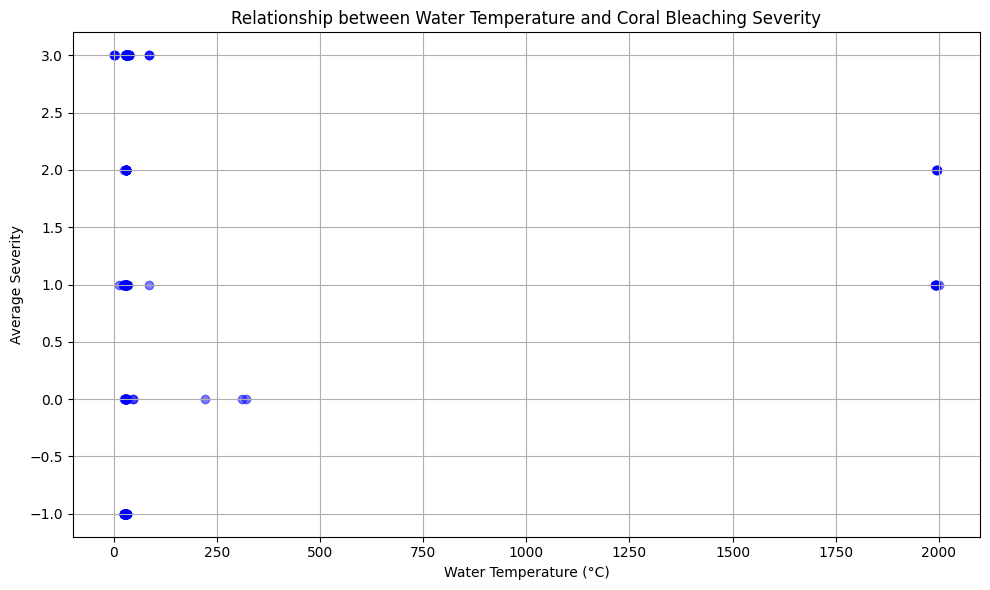

In [ ]:
# Extract numeric values from water temperature range
df['WATER_TEMP_MIN'] = df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)')
df['WATER_TEMP_MAX'] = df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)', expand=False)

# Convert extracted values to numeric
df['WATER_TEMP_MIN'] = pd.to_numeric(df['WATER_TEMP_MIN'], errors='coerce')
df['WATER_TEMP_MAX'] = pd.to_numeric(df['WATER_TEMP_MAX'], errors='coerce')

# Calculate average temperature
df['WATER_TEMP_AVG'] = (df['WATER_TEMP_MIN'] + df['WATER_TEMP_MAX']) / 2

# Plot relationship between water temperature and average severity
plt.figure(figsize=(10, 6))
plt.scatter(df['WATER_TEMP_AVG'], df['SEVERITY_CODE'], color='b', alpha=0.5)
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Average Severity')
plt.title('Relationship between Water Temperature and Coral Bleaching Severity')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the feature matrix (X)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a linear regression model on the imputed data
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict severity for a new water temperature value
new_temperature = [[30]]  # Example: predict severity for a water temperature of 30°C
new_temperature_imputed = imputer.transform(new_temperature)
predicted_severity = model.predict(new_temperature_imputed)
print("Predicted Severity:", predicted_severity)


NameError: name 'X_train' is not defined

In [ ]:
# Find the maximum severity value and its index
max_severity_index = df['SEVERITY_CODE'].idxmax()
max_severity = df.loc[max_severity_index, 'SEVERITY_CODE']

# Get the latitude and longitude corresponding to the maximum severity
worst_lat = df.loc[max_severity_index, 'LAT']
worst_lon = df.loc[max_severity_index, 'LON']

print("Latitude of the worst severity:", worst_lat)
print("Longitude of the worst severity:", worst_lon)
print("Maximum severity:", max_severity)


Latitude of the worst severity: 16.0
Longitude of the worst severity: -95.0
Maximum severity: 3


In [ ]:
# Find records with the highest severity
worst_records = df[df['SEVERITY_CODE'] == df['SEVERITY_CODE'].max()]

# Extract latitude and longitude values for the worst records
worst_latitudes = worst_records['LAT'].values
worst_longitudes = worst_records['LON'].values

# Print the worst severity and corresponding coordinates
print("Worst Severity:", worst_records['SEVERITY_CODE'].values[0])
print("Latitude:", worst_latitudes)
print("Longitude:", worst_longitudes)


Worst Severity: 3
Latitude: [16.   -5.25 -6.1  ... 21.35 27.83  6.4 ]
Longitude: [ -95.           72.47         71.73333333 ... -157.93333333 -175.83
 -162.4       ]


In [ ]:
import folium

# Create a folium map centered at the worst severity location
map_center = [worst_lat, worst_lon]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add a marker at the worst severity location
folium.Marker(location=[worst_lat, worst_lon], popup='Worst Severity Location').add_to(mymap)

# Display the map
mymap.save('worst_severity_map.html')


In [ ]:
# Filter the dataset to include only rows with the highest severity level
highest_severity_df = df[df['SEVERITY_CODE'] == max_severity].copy()

# Convert water temperature to numerical values
highest_severity_df['WATER_TEMP_MIN'] = highest_severity_df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)')
highest_severity_df['WATER_TEMP_MAX'] = highest_severity_df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)', expand=False)

# Convert extracted values to numeric
highest_severity_df['WATER_TEMP_MIN'] = pd.to_numeric(highest_severity_df['WATER_TEMP_MIN'], errors='coerce')
highest_severity_df['WATER_TEMP_MAX'] = pd.to_numeric(highest_severity_df['WATER_TEMP_MAX'], errors='coerce')

# Calculate average temperature
highest_severity_df['WATER_TEMP_AVG'] = (highest_severity_df['WATER_TEMP_MIN'] + highest_severity_df['WATER_TEMP_MAX']) / 2

# Calculate the average temperature for locations with the highest severity level
average_temp_highest_severity = highest_severity_df['WATER_TEMP_AVG'].mean()

print("Average water temperature for locations with the highest severity level:", average_temp_highest_severity)


Average water temperature for locations with the highest severity level: 33.04447368421053


In [ ]:
# Convert water temperature to numerical values
df['WATER_TEMP_MIN'] = df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)')
df['WATER_TEMP_MAX'] = df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)', expand=False)

# Convert extracted values to numeric
df['WATER_TEMP_MIN'] = pd.to_numeric(df['WATER_TEMP_MIN'], errors='coerce')
df['WATER_TEMP_MAX'] = pd.to_numeric(df['WATER_TEMP_MAX'], errors='coerce')

# Calculate average temperature
df['WATER_TEMP_AVG'] = (df['WATER_TEMP_MIN'] + df['WATER_TEMP_MAX']) / 2

# Group by severity level and calculate average temperature for each group
average_temp_by_severity = df.groupby('SEVERITY_CODE')['WATER_TEMP_AVG'].mean()

print("Average water temperature for each severity level:")
print(average_temp_by_severity)


Average water temperature for each severity level:
SEVERITY_CODE
-1     27.512195
 0     65.059091
 1    460.737073
 2    386.300000
 3     33.044474
Name: WATER_TEMP_AVG, dtype: float64


In [ ]:
# Define the severity levels
severity_levels = sorted(df['SEVERITY_CODE'].unique())

# Create an empty dictionary to store average temperatures for each severity level
average_temperatures = {}

# Iterate over each severity level
for severity_level in severity_levels:
    # Filter the dataset to include only rows with the current severity level
    filtered_df = df[df['SEVERITY_CODE'] == severity_level].copy()

    # Convert water temperature to numerical values
    filtered_df['WATER_TEMP_MIN'] = filtered_df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)')
    filtered_df['WATER_TEMP_MAX'] = filtered_df['WATER_TEMPERATURE'].str.extract(r'(\d+.\d+)', expand=False)
    filtered_df['WATER_TEMP_MIN'] = pd.to_numeric(filtered_df['WATER_TEMP_MIN'], errors='coerce')
    filtered_df['WATER_TEMP_MAX'] = pd.to_numeric(filtered_df['WATER_TEMP_MAX'], errors='coerce')

    # Calculate average temperature
    filtered_df['WATER_TEMP_AVG'] = (filtered_df['WATER_TEMP_MIN'] + filtered_df['WATER_TEMP_MAX']) / 2

    # Calculate the average temperature for the current severity level
    average_temperature = filtered_df['WATER_TEMP_AVG'].mean()

    # Store the average temperature in the dictionary
    average_temperatures[severity_level] = average_temperature

# Print average temperatures for each severity level
for severity_level, average_temp in average_temperatures.items():
    print(f"Average water temperature for severity level {severity_level}: {average_temp}")


Average water temperature for severity level -1: 27.51219512195122
Average water temperature for severity level 0: 65.05909090909091
Average water temperature for severity level 1: 460.7370731707317
Average water temperature for severity level 2: 386.3
Average water temperature for severity level 3: 33.04447368421053


In [ ]:
# Iterate over each severity level
for severity_level in severity_levels:
    # Filter the dataset to include only rows with the current severity level
    filtered_df = df[df['SEVERITY_CODE'] == severity_level].copy()

    # Display the data for the current severity level
    print(f"Data for severity level {severity_level}:")
    print(filtered_df[['WATER_TEMPERATURE', 'WATER_TEMP_MIN', 'WATER_TEMP_MAX', 'WATER_TEMP_AVG']].head())


Data for severity level -1:
   WATER_TEMPERATURE  WATER_TEMP_MIN  WATER_TEMP_MAX  WATER_TEMP_AVG
3         22-23.9 °C             NaN             NaN             NaN
5                NaN             NaN             NaN             NaN
27               NaN             NaN             NaN             NaN
28               NaN             NaN             NaN             NaN
47               NaN             NaN             NaN             NaN
Data for severity level 0:
                                    WATER_TEMPERATURE  WATER_TEMP_MIN  \
0                                                 NaN             NaN   
1                                                 NaN             NaN   
2                                                 NaN             NaN   
4              Air temp 28 Deg C, Water temp 29 Deg C             NaN   
11  Air temperature 30 deg C, water temperature 28...             NaN   

    WATER_TEMP_MAX  WATER_TEMP_AVG  
0              NaN             NaN  
1              NaN

In [ ]:
# Define grid or binning strategy
lat_bins = np.linspace(df['LAT'].min(), df['LAT'].max(), num=10)
lon_bins = np.linspace(df['LON'].min(), df['LON'].max(), num=10)

# Bin latitude and longitude coordinates
df['LAT_BIN'] = pd.cut(df['LAT'], bins=lat_bins)
df['LON_BIN'] = pd.cut(df['LON'], bins=lon_bins)

# Group by latitude and longitude bins and calculate average severity level
avg_severity_by_region = df.groupby(['LAT_BIN', 'LON_BIN'])['SEVERITY_CODE'].mean()

print("Average severity level for each region:")
print(avg_severity_by_region)


NameError: name 'np' is not defined

In [ ]:
import numpy as np  # Import NumPy library

# Define grid or binning strategy
lat_bins = np.linspace(df['LAT'].min(), df['LAT'].max(), num=10)
lon_bins = np.linspace(df['LON'].min(), df['LON'].max(), num=10)

# Bin latitude and longitude coordinates
df['LAT_BIN'] = pd.cut(df['LAT'], bins=lat_bins)
df['LON_BIN'] = pd.cut(df['LON'], bins=lon_bins)

# Group by latitude and longitude bins and calculate average severity level
avg_severity_by_region = df.groupby(['LAT_BIN', 'LON_BIN'])['SEVERITY_CODE'].mean()

print("Average severity level for each region:")
print(avg_severity_by_region)


Average severity level for each region:
LAT_BIN                LON_BIN            
(-10269.0, -9122.815]  (-179.967, -139.97]         NaN
                       (-139.97, -99.974]          NaN
                       (-99.974, -59.978]          NaN
                       (-59.978, -19.982]          NaN
                       (-19.982, 20.015]           NaN
                                                ...   
(-1099.518, 46.667]    (-19.982, 20.015]     -1.000000
                       (20.015, 60.011]       1.466877
                       (60.011, 100.007]      1.177340
                       (100.007, 140.004]     1.138889
                       (140.004, 180.0]       0.683876
Name: SEVERITY_CODE, Length: 81, dtype: float64
